In [2]:
import pandas as pd
import numpy as np

In [3]:
BD_tran = pd.read_excel('BD.xlsx',sheet_name='transacciones')
BD_clientes = pd.read_excel('BD.xlsx',sheet_name='clientes')
print(BD_tran.head())
print()
print(BD_clientes.head())

   id transaccion fecha transaccion  Monto transaccion  id cliente
0               1        2013-01-01              26770           5
1               2        2018-06-01             731713          20
2               3        2018-06-22             379746           1
3               4        2015-04-19              31570           8
4               5        2014-08-02             784803           5

   id cliente     nombre genero fecha_nacimiento       pais
0           1   Anderson      M       1988-11-16   Colombia
1           2     Andres      M       1976-04-01  Venezuela
2           3      Bryan      M       1986-04-03     Panama
3           4     Carlos      M       1996-04-27     Mexico
4           5  Cristhian      M       2006-04-12       Peru


In [4]:
BD_tran=BD_tran.set_index('id cliente')
BD_clientes = BD_clientes.set_index('id cliente')

In [5]:
BD = pd.merge(BD_tran,BD_clientes,how='outer',left_index=True, right_index=True)
BD.head()

,id transaccion,fecha transaccion,Monto transaccion,nombre,genero,fecha_nacimiento,pais
id cliente,,,,,,,
1,3,2018-06-22,379746,Anderson,M,1988-11-16,Colombia
1,8,2014-08-11,670848,Anderson,M,1988-11-16,Colombia
1,12,2019-05-23,536687,Anderson,M,1988-11-16,Colombia
1,14,2015-12-21,235278,Anderson,M,1988-11-16,Colombia
1,15,2019-04-27,365423,Anderson,M,1988-11-16,Colombia


## Cliente que más transacciones tiene

In [127]:
BD_mas_tran = BD.groupby('nombre').agg('id transaccion')
BD_mas_tran.count().idxmax()

'Daniel'

## Cliente que más dinero ha gastado

In [131]:
BD_monto = BD.groupby('nombre').agg({'Monto transaccion': np.sum})
BD_monto.idxmax()

Monto transaccion    Daniel
dtype: object

## Agrupación por genero y mostrar la cantidad de transacciones.

In [102]:
BD_gen = BD.groupby('genero').count()
pd.Series(BD_gen['Monto transaccion'],name='Cantidad transacciones')

genero
F    1753
M    3247
Name: Cantidad transacciones, dtype: int64

## Cliente con la transacción más alta

In [132]:
BD_monto = BD.groupby('nombre').agg({'Monto transaccion': np.max})
BD_monto.idxmax()

Monto transaccion    Juan
dtype: object

## País con más ventas en dinero

In [238]:
BD_pais = BD[(BD['fecha transaccion']>='2018-03-01')&(BD['fecha transaccion']<='2019-11-30')]
BD_pais = BD_pais.sort_values(by='fecha transaccion')
BD_pais = BD.groupby('pais').agg({'Monto transaccion':np.sum})
BD_pais

,Monto transaccion
pais,
Argentina,103405261
Chile,315651605
Colombia,311088506
Ecuador,196506572
Mexico,227433292
Panama,303445731
Peru,391210573
Venezuela,202928247


## Top 5 de clientes con más transacciones

In [151]:
BD_top_5 = BD.groupby('nombre').agg('id transaccion')
BD_top_5.count().sort_values(ascending=False)[:5]

nombre
Daniel     289
Isaac      265
Paula      262
Tatiana    258
Mario      256
Name: id transaccion, dtype: int64

## Grafica de países y número de transacciones

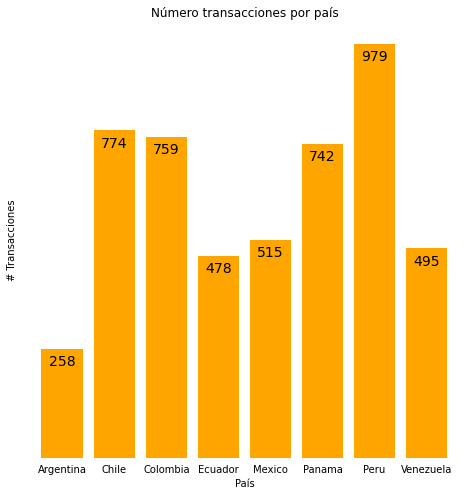

In [207]:
import matplotlib.pyplot as plt
columnas = ['pais','id transaccion']
BD_grafica = BD[columnas]
BD_grafica = BD_grafica.groupby('pais').agg('id transaccion').count()
BD_grafica = BD_grafica.reset_index()

pais = BD_grafica['pais']
transacciones = BD_grafica['id transaccion']
plt.figure(figsize=(8,8))
bar =plt.bar(pais,transacciones, color='orange')
plt.ylabel('# Transacciones')
plt.xlabel('País')
plt.title('Número transacciones por país')

plt.tick_params(bottom = False,left=False,labelleft=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for bars in bar:
    plt.gca().text(bars.get_x() + bars.get_width()/2, bars.get_height()-40,str(int(bars.get_height())),
                   ha='center', color='black', fontsize='14')

## Gráfica de distibución edades de clientes

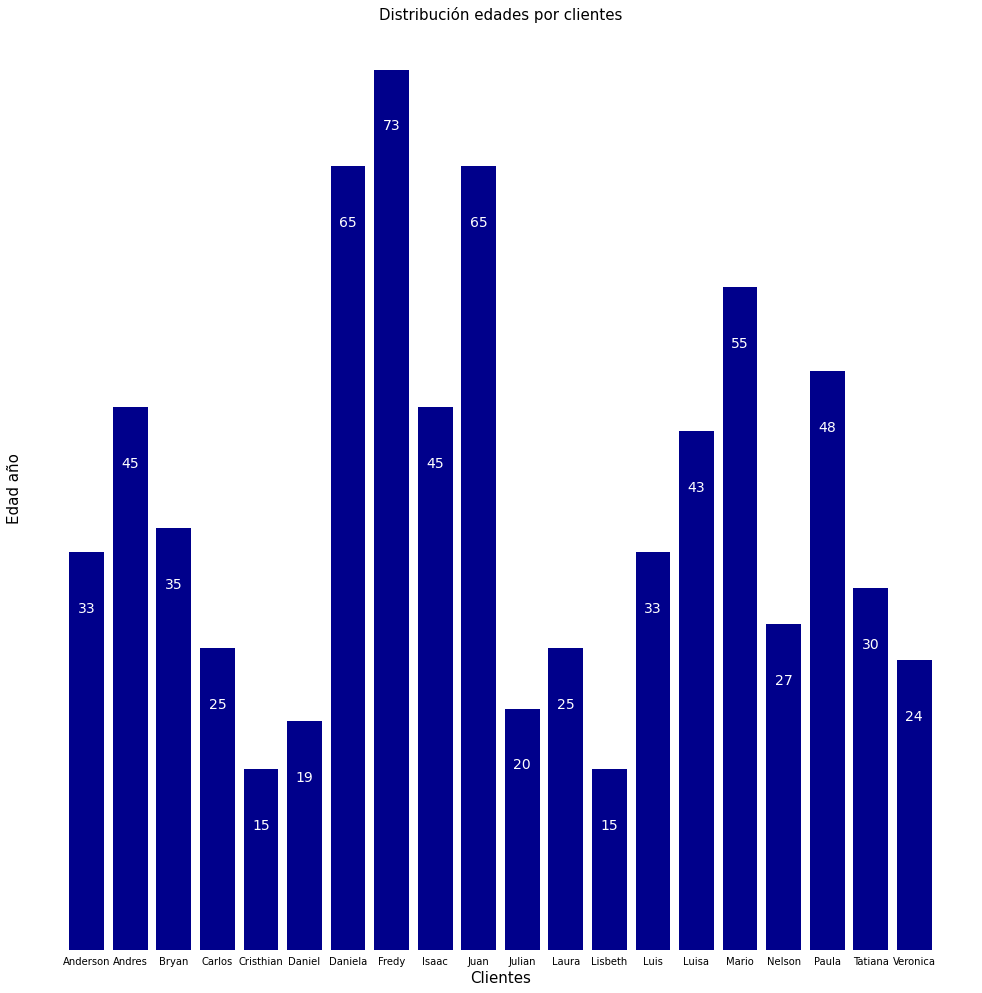

In [428]:
from datetime import date
hoy = date.today()
año_hoy = hoy.year
#año_hoy = int(año_hoy)
BD_fecha_naci= BD.groupby('nombre').agg({'fecha_nacimiento':np.max})
BD_fecha_naci['Año_actual'] = año_hoy
separar = BD_fecha_naci['fecha_nacimiento'].astype('string').str[:4]
BD_fecha_naci['nacimiento']=separar.astype('int')
BD_fecha_naci = BD_fecha_naci.drop(columns='fecha_nacimiento')
BD_fecha_naci = BD_fecha_naci['Año_actual'] - BD_fecha_naci['nacimiento']
BD_fecha_naci = BD_fecha_naci.reset_index().rename(columns ={0:'edad'})

cliente = BD_fecha_naci['nombre']
edad = BD_fecha_naci['edad']

plt.figure(figsize=(17,17))

bar2=plt.bar(cliente,edad,color='darkblue')
plt.ylabel('Edad',fontsize=15)
plt.xlabel('Clientes',fontsize=15)
plt.title('Distribución edades por clientes',fontsize=15)

plt.tick_params(bottom = False,left=False,labelleft=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for bars in bar2:
    plt.gca().text(bars.get_x() + bars.get_width()/2, bars.get_height()-5,str(int(bars.get_height())),
                   ha='center', color='white', fontsize='14')